# 1. 라이브러리 세팅

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 컬럼의 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 출력할 행의 수를 설정 (필요에 따라 조정)
pd.set_option('display.max_rows', 100)


In [3]:
# 맷플롯립 한글 설정 
# matplotlib Korean font
plt.rc('font', family='Malgun Gothic')

# 2. 지도 데이터 불러오기

In [8]:
# 지도 데이터
# sejong_zone = gpd.read_file('00data/11.세종시_대상구역도.geojson')
sejong_boundary = gpd.read_file('00data/17.세종시_대상구역_바깥경계.geojson')
sejong_blding_dong = gpd.read_file('00data/건물군내동도형_전체분_세종특별자치시/Total.JUSUED.20240701.TL_SGCO_RNADR_DONG.36110.shp')
sejong_blding = gpd.read_file('00data\건물도형_전체분_세종특별자치시\건물도형쉐이프.shp')

In [9]:
# crs 4326으로 통일
sejong_blding_dong = sejong_blding_dong.set_crs(epsg=5179)
sejong_blding = sejong_blding.set_crs(epsg=5179)

In [10]:
sejong_blding_dong = sejong_blding_dong.to_crs(epsg=4326)
sejong_blding = sejong_blding.to_crs(epsg=4326)

<Axes: >

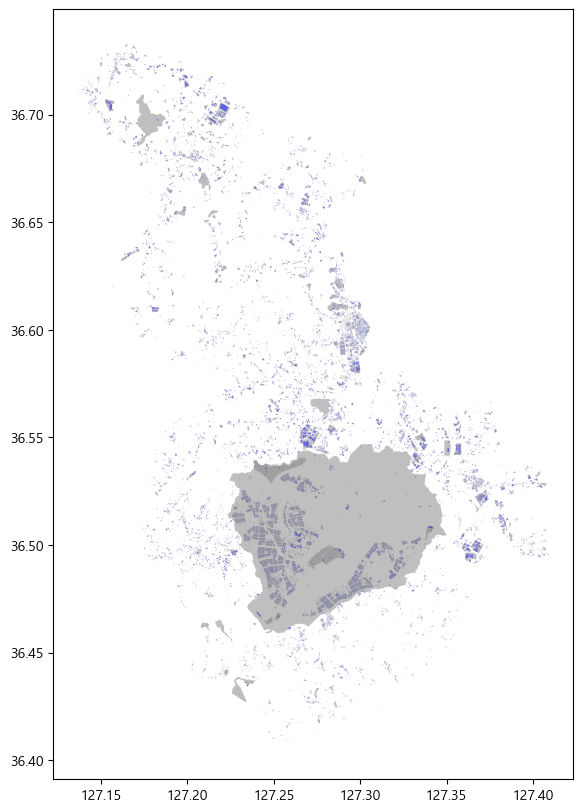

In [11]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# sejong_zone.boundary.plot(ax=ax, color='black', linewidth=1)
sejong_boundary.plot(ax=ax, color='gray', linewidth = 0.5, alpha=0.5)
sejong_blding.plot(ax=ax, color='gray', alpha=0.5)
sejong_blding_dong.plot(ax=ax, color='blue', alpha=0.5)

# 3. 지도 전처리

In [12]:
# 건물 쉐이프 파일 경계 내부에 있는 것만 추출
blding_zone = gpd.overlay(sejong_blding, sejong_boundary, how='intersection')
blding_dong_zone = gpd.overlay(sejong_blding_dong, sejong_boundary, how='intersection')


<Axes: >

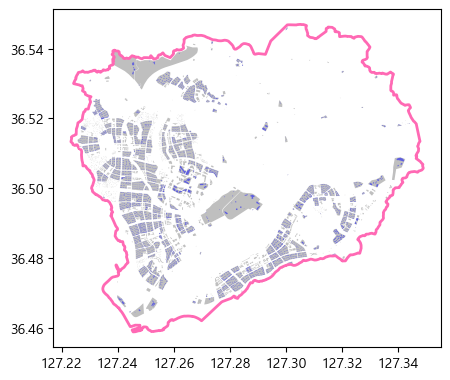

In [13]:
# 시각화 
fig, ax = plt.subplots(1,1, figsize=(5,5))
sejong_boundary.boundary.plot(ax=ax, color='hotpink', linewidth=2)
blding_zone.plot(ax=ax, color='gray', alpha=0.5)
blding_dong_zone.plot(ax=ax, color='blue', alpha=0.5)

In [ ]:
# into files
blding_zone.to_file('00data/지도_세종시_건물_경계내.geojson', driver='GeoJSON')
blding_dong_zone.to_file('00data/지도_세종시_건물_동_경계내.geojson', driver='GeoJSON')

|컬럼명|한글컬럼명|
|---|---|
| ADR_MNG_NO | 도로명주소관리번호 |
|SIG_CD||
|RN_CD|도로명번호|
|BULD_SE_CD|지하여부|
|BULD_MNNM|건물본번|
|BULD_SLNO|건물부번|
|BUL_MAN_NO|건물일련번호|
|EQB_MAN_SN|건물군일련번호|
|BD_MGT_SN|건물관리번호|
|XGEOMETRY|공간정보|


# 4. 주소지 데이터 불러오기 

In [36]:
col_names = ['ADR_MNG_NO', 'emd_cd', 'sido_nm', '4', 'emd_nm' ,'li_nm', '7', '8', '9', '10',
             'rd_nm', '12', '13', '14', '15', '16', '17', '18', '19', '20',
             '21', '22', 'bld_nm', '24']
# addr = pd.read_csv('00data/202406_도로명주소 한글_전체분/jibun_rnaddrkor_sejong.txt', delimiter='|', encoding='cp949', names =col_names)
rn_addr = pd.read_csv('00data/202406_도로명주소 한글_전체분/rnaddrkor_sejong.txt', delimiter='|', encoding='cp949', names =col_names)
# rn_addr.drop(['21', '24', '18', '4', '12'], axis=1, inplace=True)
rn_addr.head()

,ADR_MNG_NO,emd_cd,sido_nm,4,emd_nm,li_nm,7,8,9,10,rd_nm,12,13,14,15,16,17,18,19,20,21,22,bld_nm,24
0,36110101200000200181100000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,899,0,361102000002,한누리대로,0,1811,0,3.611056e+09,반곡동,30145,NaN,20181204,0,NaN,NaN,수루배마을5단지 상가동,NaN
1,36110101200000200182000000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,862,0,361102000002,한누리대로,0,1820,0,3.611056e+09,반곡동,30146,NaN,20191202,0,NaN,NaN,왕관빌딩,NaN
2,36110101200000200182100000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,899,0,361102000002,한누리대로,0,1821,0,3.611056e+09,반곡동,30145,NaN,20181204,0,NaN,NaN,수루배마을5단지 상가동,NaN
3,36110101200000200182400000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,865,0,361102000002,한누리대로,0,1824,0,3.611056e+09,반곡동,30146,NaN,20191209,0,NaN,NaN,NaN,NaN
4,36110101200000200182800000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,865,0,361102000002,한누리대로,0,1828,0,3.611056e+09,반곡동,30146,NaN,20190716,0,NaN,NaN,시드니블루,NaN


In [37]:
rn_addr['14'].isna().sum()

0

In [38]:
rn_addr[rn_addr['ADR_MNG_NO']== '36110107335127700003300006']

,ADR_MNG_NO,emd_cd,sido_nm,4,emd_nm,li_nm,7,8,9,10,rd_nm,12,13,14,15,16,17,18,19,20,21,22,bld_nm,24
428,36110107335127700003300006,3611010700,세종특별자치시,NaN,나성동,NaN,0,784,0,361103351277,나성로,0,33,6,3.611052e+09,나성동,30129,NaN,20160810,0,NaN,NaN,NaN,NaN


In [39]:
rn_addr.dtypes

ADR_MNG_NO     object
emd_cd          int64
sido_nm        object
4             float64
emd_nm         object
li_nm          object
7               int64
8               int64
9               int64
10              int64
rd_nm          object
12              int64
13              int64
14              int64
15            float64
16             object
17              int64
18            float64
19              int64
20              int64
21            float64
22             object
bld_nm         object
24            float64
dtype: object

In [40]:
# 도로명 주소 변환
rn_addr['13'] = rn_addr['13'].astype(str)
rn_addr['14'] = rn_addr['14'].astype(str)

def road_address(row):
    if row['14'] == '0':
        return row['sido_nm'] + ' ' + row['rd_nm'] +' '+ row['13']
    else:
        return row['sido_nm'] + ' ' + row['rd_nm'] +' '+ row['13'] + '-' + row['14']

rn_addr['rd_addr'] = rn_addr.apply(road_address, axis = 1)

rn_addr.head()

,ADR_MNG_NO,emd_cd,sido_nm,4,emd_nm,li_nm,7,8,9,10,rd_nm,12,13,14,15,16,17,18,19,20,21,22,bld_nm,24,rd_addr
0,36110101200000200181100000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,899,0,361102000002,한누리대로,0,1811,0,3.611056e+09,반곡동,30145,NaN,20181204,0,NaN,NaN,수루배마을5단지 상가동,NaN,세종특별자치시 한누리대로 1811
1,36110101200000200182000000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,862,0,361102000002,한누리대로,0,1820,0,3.611056e+09,반곡동,30146,NaN,20191202,0,NaN,NaN,왕관빌딩,NaN,세종특별자치시 한누리대로 1820
2,36110101200000200182100000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,899,0,361102000002,한누리대로,0,1821,0,3.611056e+09,반곡동,30145,NaN,20181204,0,NaN,NaN,수루배마을5단지 상가동,NaN,세종특별자치시 한누리대로 1821
3,36110101200000200182400000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,865,0,361102000002,한누리대로,0,1824,0,3.611056e+09,반곡동,30146,NaN,20191209,0,NaN,NaN,NaN,NaN,세종특별자치시 한누리대로 1824
4,36110101200000200182800000,3611010100,세종특별자치시,NaN,반곡동,NaN,0,865,0,361102000002,한누리대로,0,1828,0,3.611056e+09,반곡동,30146,NaN,20190716,0,NaN,NaN,시드니블루,NaN,세종특별자치시 한누리대로 1828


In [41]:
rn_addr = rn_addr[['ADR_MNG_NO', 'emd_cd', 'emd_nm','rd_addr', 'bld_nm']]
rn_addr.head()

,ADR_MNG_NO,emd_cd,emd_nm,rd_addr,bld_nm
0,36110101200000200181100000,3611010100,반곡동,세종특별자치시 한누리대로 1811,수루배마을5단지 상가동
1,36110101200000200182000000,3611010100,반곡동,세종특별자치시 한누리대로 1820,왕관빌딩
2,36110101200000200182100000,3611010100,반곡동,세종특별자치시 한누리대로 1821,수루배마을5단지 상가동
3,36110101200000200182400000,3611010100,반곡동,세종특별자치시 한누리대로 1824,NaN
4,36110101200000200182800000,3611010100,반곡동,세종특별자치시 한누리대로 1828,시드니블루


In [42]:
# 주소 데이터와 건물 데이터 병합

total_bld = pd.merge(blding_zone, rn_addr, on='ADR_MNG_NO', how='left')
print(blding_zone.shape)
print(total_bld.shape)
total_bld.head(1)

(1843, 10)
(1843, 14)


,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,geometry,emd_cd,emd_nm,rd_addr,bld_nm
0,36110340300009800011000005,36110,3000098,0,110,5,0,1301,20120701,"POLYGON ((127.29031 36.47339, 127.29055 36.47349, 127.29064 36.47335, 127.29055 36.47334, 127.29054 36.47334, 127.29053 36.47334, 127.29052 36.47334, 127.29051 36.47334, 127.29051 36.47335, 127.29048 36.47333, 127.29048 36.47333, 127.29047 36.47333, 127.29037 36.47330, 127.29037 36.47329, 127.29036 36.47329, 127.29032 36.47329, 127.29031 36.47328, 127.29030 36.47328, 127.29029 36.47329, 127.29028 36.47329, 127.29025 36.47329, 127.29021 36.47329, 127.29020 36.47329, 127.29020 36.47329, 127.29031 36.47339))",3611034038,금남면,세종특별자치시 금남구즉로 110-5,NaN


In [43]:
total_bld[total_bld.ADR_MNG_NO == '36110107335127700003300006']

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,geometry,emd_cd,emd_nm,rd_addr,bld_nm
1728,36110107335127700003300006,36110,3351277,0,33,6,60189,0,20160810,"POLYGON ((127.26292 36.48276, 127.26299 36.48280, 127.26309 36.48266, 127.26280 36.48252, 127.26257 36.48283, 127.26286 36.48297, 127.26291 36.48291, 127.26284 36.48287, 127.26292 36.48276))",3611010700,나성동,세종특별자치시 나성로 33-6,NaN


# 5. 건축물 통합 데이터 내보내기

In [44]:
total_bld.to_file('00data/지도_세종시_건물_주소_경계내.geojson', driver='GeoJSON')

In [6]:
# import files 
total_bld = gpd.read_file('00data/지도_세종시_건물_주소_경계내.geojson')

In [8]:
total_bld[total_bld.rd_addr == '세종특별자치시 해밀3로 32']

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr,bld_nm,geometry
7,36110116335282800003200000,36110,3352828,0,32,0,0,24847,20200825,3611011600,해밀동,세종특별자치시 해밀3로 32,해밀마을1단지,"POLYGON ((127.26567 36.52910, 127.26579 36.52917, 127.26596 36.52926, 127.26663 36.52943, 127.26677 36.52946, 127.26703 36.52958, 127.26716 36.52966, 127.26728 36.52965, 127.26747 36.52950, 127.26759 36.52932, 127.26766 36.52914, 127.26767 36.52899, 127.26765 36.52882, 127.26753 36.52866, 127.26750 36.52858, 127.26752 36.52850, 127.26754 36.52845, 127.26757 36.52842, 127.26757 36.52835, 127.26757 36.52832, 127.26721 36.52619, 127.26721 36.52613, 127.26722 36.52603, 127.26723 36.52592, 127.26730 36.52572, 127.26741 36.52556, 127.26764 36.52530, 127.26791 36.52504, 127.26810 36.52485, 127.26808 36.52478, 127.26766 36.52459, 127.26750 36.52454, 127.26735 36.52452, 127.26722 36.52452, 127.26707 36.52455, 127.26688 36.52460, 127.26662 36.52473, 127.26634 36.52486, 127.26594 36.52504, 127.26559 36.52518, 127.26552 36.52526, 127.26541 36.52530, 127.26529 36.52528, 127.26520 36.52521, 127.26518 36.52512, 127.26519 36.52504, 127.26513 36.52496, 127.26372 36.52539, 127.26350 36.52551, 127.26343 36.52558, 127.26325 36.52577, 127.26332 36.52607, 127.26334 36.52616, 127.26335 36.52636, 127.26341 36.52650, 127.26353 36.52669, 127.26363 36.52686, 127.26414 36.52751, 127.26457 36.52802, 127.26486 36.52832, 127.26504 36.52849, 127.26533 36.52879, 127.26540 36.52886, 127.26567 36.52910))"
